In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Output File
output_data_file = "output_data/cities.csv"

In [2]:
# List the lat and cities 
lat_lngs = []
cities = []

#Create list of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Id nearest city for each combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    #If city is unique then add to list
    if city not in cities:
        cities.append(city)
        
#Print city count
print(len(cities))

611


In [3]:
#Base Url

url = "http://api.openweathermap.org/data/2.5/weather?"

#counter for loop

record = 0
sets = 1

#Create DataFrame
weatherpy_df = pd.DataFrame({"City":cities})

weatherpy_df["Country"] = ""
weatherpy_df["Date"] = ""
weatherpy_df["Latitude"] = ""
weatherpy_df["Longitude"] = ""
weatherpy_df["Cloudiness (%)"] = ""
weatherpy_df["Humidity (%)"] = ""
weatherpy_df["Max Temp (F)"] = ""
weatherpy_df["Wind Speed (mph)"] = ""

#Start data retrival by going through Cities

print("Begin data retrieval")
print("---------------------------")

for index, row in weatherpy_df.iterrows():
    
        city = row["City"]
        
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        weather_response = requests.get(query_url).json()
        
        try:
            print(f"Processing Record {record}  of Set {sets} | {city}.")
            
            weatherpy_df.loc[index, "Country"] = weather_response["sys"]["country"]     
            weatherpy_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
            weatherpy_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
            weatherpy_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
            weatherpy_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
            weatherpy_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
            weatherpy_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
            weatherpy_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
        
        except:
            print(f"City not found...skipping {city}.")
        
        record = record + 1
        if record == 50:
            record = 0
            sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Begin data retrieval
---------------------------
Processing Record 0  of Set 1 | buraydah.
Processing Record 1  of Set 1 | ushuaia.
Processing Record 2  of Set 1 | yulara.
Processing Record 3  of Set 1 | torbay.
Processing Record 4  of Set 1 | aklavik.
Processing Record 5  of Set 1 | senador jose porfirio.
Processing Record 6  of Set 1 | havelock.
Processing Record 7  of Set 1 | busselton.
Processing Record 8  of Set 1 | sakakah.
Processing Record 9  of Set 1 | hovd.
Processing Record 10  of Set 1 | kijang.
Processing Record 11  of Set 1 | saint george.
Processing Record 12  of Set 1 | igarka.
Processing Record 13  of Set 1 | axim.
Processing Record 14  of Set 1 | punta arenas.
Processing Record 15  of Set 1 | airai.
Processing Record 16  of Set 1 | albany.
Processing Record 17  of Set 1 | kavaratti.
Processing Record 18  of Set 1 | taolanaro.
City not found...skipping taolanaro.
Processing Record 19  of Set 1 | cape town.
Processing Record 20  of Set 1 | puerto maldonado.
Processing R

Processing Record 27  of Set 4 | hambantota.
Processing Record 28  of Set 4 | bambous virieux.
Processing Record 29  of Set 4 | tautira.
Processing Record 30  of Set 4 | naze.
Processing Record 31  of Set 4 | nalut.
Processing Record 32  of Set 4 | seabra.
Processing Record 33  of Set 4 | alofi.
Processing Record 34  of Set 4 | portland.
Processing Record 35  of Set 4 | tezu.
Processing Record 36  of Set 4 | jieshi.
Processing Record 37  of Set 4 | geraldton.
Processing Record 38  of Set 4 | chongqing.
Processing Record 39  of Set 4 | faya.
Processing Record 40  of Set 4 | caravelas.
Processing Record 41  of Set 4 | ancud.
Processing Record 42  of Set 4 | new norfolk.
Processing Record 43  of Set 4 | sri aman.
Processing Record 44  of Set 4 | saint-augustin.
Processing Record 45  of Set 4 | filadelfia.
Processing Record 46  of Set 4 | cidreira.
Processing Record 47  of Set 4 | lebu.
Processing Record 48  of Set 4 | sioux lookout.
Processing Record 49  of Set 4 | poplar bluff.
Processin

Processing Record 8  of Set 8 | berlevag.
Processing Record 9  of Set 8 | hukuntsi.
Processing Record 10  of Set 8 | sataua.
City not found...skipping sataua.
Processing Record 11  of Set 8 | ygatimi.
Processing Record 12  of Set 8 | alexandria.
Processing Record 13  of Set 8 | maningrida.
Processing Record 14  of Set 8 | dingle.
Processing Record 15  of Set 8 | inhambane.
Processing Record 16  of Set 8 | novobirilyussy.
Processing Record 17  of Set 8 | borogontsy.
Processing Record 18  of Set 8 | sao pedro.
Processing Record 19  of Set 8 | meulaboh.
Processing Record 20  of Set 8 | chokurdakh.
Processing Record 21  of Set 8 | granadilla de abona.
Processing Record 22  of Set 8 | kuruman.
Processing Record 23  of Set 8 | kalmunai.
Processing Record 24  of Set 8 | guaymas.
Processing Record 25  of Set 8 | port-gentil.
Processing Record 26  of Set 8 | vinh.
Processing Record 27  of Set 8 | awbari.
Processing Record 28  of Set 8 | longyearbyen.
Processing Record 29  of Set 8 | faanui.
Pro

Processing Record 30  of Set 11 | luanda.
Processing Record 31  of Set 11 | dinghai.
Processing Record 32  of Set 11 | nikitinskiy.
Processing Record 33  of Set 11 | sechura.
Processing Record 34  of Set 11 | muisne.
Processing Record 35  of Set 11 | noumea.
Processing Record 36  of Set 11 | hongjiang.
Processing Record 37  of Set 11 | maloshuyka.
City not found...skipping maloshuyka.
Processing Record 38  of Set 11 | saint anthony.
Processing Record 39  of Set 11 | mangrol.
Processing Record 40  of Set 11 | sa kaeo.
Processing Record 41  of Set 11 | nouna.
Processing Record 42  of Set 11 | micheweni.
Processing Record 43  of Set 11 | vanavara.
Processing Record 44  of Set 11 | moose factory.
Processing Record 45  of Set 11 | takhli.
Processing Record 46  of Set 11 | mrirt.
City not found...skipping mrirt.
Processing Record 47  of Set 11 | asau.
Processing Record 48  of Set 11 | kungurtug.
Processing Record 49  of Set 11 | alice town.
Processing Record 0  of Set 12 | jawa.
Processing R

In [4]:
weatherpy_df.count()


City                611
Country             611
Date                611
Latitude            611
Longitude           611
Cloudiness (%)      611
Humidity (%)        611
Max Temp (F)        611
Wind Speed (mph)    611
dtype: int64

In [5]:
weatherpy_df.head()


,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,buraydah,SA,2020-09-29 17:01:53,26.33,43.98,0,31,75.47,2.1
1,ushuaia,AR,2020-09-29 17:01:13,-54.8,-68.3,75,86,34.07,9.3
2,yulara,AU,2020-09-29 17:01:53,-25.24,130.99,0,56,70.07,6.2
3,torbay,CA,2020-09-29 17:00:55,47.67,-52.73,90,93,66.47,9.3
4,aklavik,CA,2020-09-29 17:01:54,68.22,-135.01,75,86,39.47,1


In [6]:
#Convert data into strings 
pd.to_numeric(weatherpy_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weatherpy_df["Humidity (%)"]).astype(float)
pd.to_numeric(weatherpy_df["Latitude"]).astype(float)
pd.to_numeric(weatherpy_df["Longitude"]).astype(float)
pd.to_numeric(weatherpy_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weatherpy_df["Wind Speed (mph)"]).astype(float)
weatherpy_df

#Export DataFrame to CSV File
weatherpy_df.to_csv("weatherpy_df.csv")


The plot proves that as we generally move away from the equator, positive or negatively, temperature drops


FileNotFoundError: [Errno 2] No such file or directory: 'Figures/LatitudeVsTemperature.png'

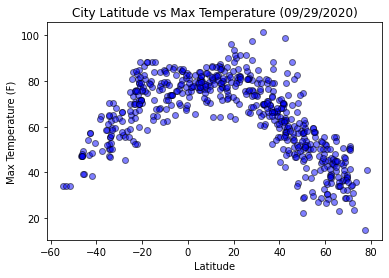

In [7]:
#Plot lat vs. temp
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weatherpy_df["Latitude"]).astype(float), pd.to_numeric(weatherpy_df["Max Temp (F)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("The plot proves that as we generally move away from the equator, positive or negatively, temperature drops")

plt.savefig("Figures/LatitudeVsTemperature.png")


In [ ]:
#Latittude vs. Humidity
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weatherpy_df["Latitude"]).astype(float), pd.to_numeric(weatherpy_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("The plot shows that there is no real correlation that can describe the relationship between latitude and humidity")

plt.savefig("Figures/LatitudeVsHumidity.png")


In [ ]:
#Latittude vs. Cloudiness
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weatherpy_df["Latitude"]).astype(float), pd.to_numeric(weatherpy_df["Cloudiness (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness (%) ({today})")
print("The plot shows that there is no real correlation that can describe the relationship between latitude and humidity")

plt.savefig("Figures/LatitudeVsCloudiness.png")


In [ ]:
#Latittude vs. Wind Speed
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weatherpy_df["Latitude"]).astype(float), pd.to_numeric(weatherpy_df["Wind Speed (mph)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed (mph) ({today})")
print("The plot shows that there is no real pattern that can describe the relationship between latitude and windspeed")

plt.savefig("Figures/LatitudeVsWindSpeed.png")



In [ ]:
#Create the hempispheres
northern_df = weatherpy_df.loc[pd.to_numeric(weatherpy_df["Latitude"]).astype(float) > 0, :]
southern_df = weatherpy_df.loc[pd.to_numeric(weatherpy_df["Latitude"]).astype(float) < 0, :]

#Plot Noth Hemisphere Max Temp vs. Lat

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

plt.savefig("Figures/NorthHemTempVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move closer to the equator the temperature increases.")
plt.show()

plt.savefig("Figures/SouthHemTempVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

plt.savefig("Figures/NorthHemHumidityVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

plt.savefig("Figures/SouthHemHumidityVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

plt.savefig("Figures/NorthHemCloudinessVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

plt.savefig("Figures/SouthHemCloudinessVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

plt.savefig("Figures/NorthHemWindSpeedVsLatitude.png")


In [ ]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

plt.savefig("Figures/SouthHemWindSpeedVsLatitude.png")
